## Function Description
Address the challenge of optimally placing products across warehouses for a business with high online sales, where accurate calculations are costly and only feasible biweekly. To speed up decision-making, an ML model approximates these results within hours. The model has four hyperparameters to tune, and its output reflects the difference from the expensive baseline. Because the system is dynamic and full of local optima, it requires careful tuning and robust validation to find reliable, near-optimal solutions.

## Load and Prepare Data

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.stats.qmc import Sobol
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning,
    module="sklearn"
)

# Load original dataset
X = np.load("../data/function_4/initial_inputs.npy")
y = np.load("../data/function_4/initial_outputs.npy")

print(f"original n: {len(X)}")
print()

# week 1 = initial

# week 2
x_new = np.array([[0.440612, 0.439807, 0.347876, 0.397313]])
y_new = np.array([0.14954105739462564])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 3
x_new = np.array([[0.385351, 0.417833, 0.397451, 0.428309]])
y_new = np.array([0.46545875691251526])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 4
x_new = np.array([[0.425101, 0.408761, 0.383672, 0.464724]])
y_new = np.array([-0.5366299556408864])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 5
x_new = np.array([[0.364063, 0.463294, 0.361100, 0.402127]])
y_new = np.array([-0.4011406013955887])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 6
x_new = np.array([[0.392032, 0.398739, 0.386269, 0.391241]])
y_new = np.array([-0.055515080978841395])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 7
x_new = np.array([[0.419987, 0.426575, 0.419386, 0.395432]])
y_new = np.array([0.62060004355598123])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 8
x_new = np.array([[0.436130, 0.445736, 0.408174, 0.387263]])
y_new = np.array([0.04652259777697809])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 9
x_new = np.array([[0.417910, 0.409233, 0.433185, 0.397325]])
y_new = np.array([0.5109470515908439])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 10
x_new = np.array([[0.398898, 0.441530, 0.446241, 0.389003]])
y_new = np.array([-0.1761455047038747])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 11
x_new = np.array([[0.412820, 0.418128, 0.404991, 0.400284]])
y_new = np.array([0.6007233718642309])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 12
x_new = np.array([[0.416761, 0.397162, 0.428039, 0.396073]])
y_new = np.array([0.4819064174798986])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 13
x_new = np.array([[0.420355, 0.418701, 0.431059, 0.393556]])
y_new = np.array([0.5631598984876978])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# final submission
x_new = np.array([[0.406841, 0.416925, 0.414395, 0.419961]])
y_new = np.array([0.7144657839951205])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

print("X:\n", X)
print()
print("y:\n", y)
print()
print("n: ", len(y))
print()
idx_best = np.argmax(y)
print(f"current maximum:\nn: {idx_best+1}\ny: {y[idx_best]}\nX: {X[idx_best]}")

original n: 30

X:
 [[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.999

## Visualisation

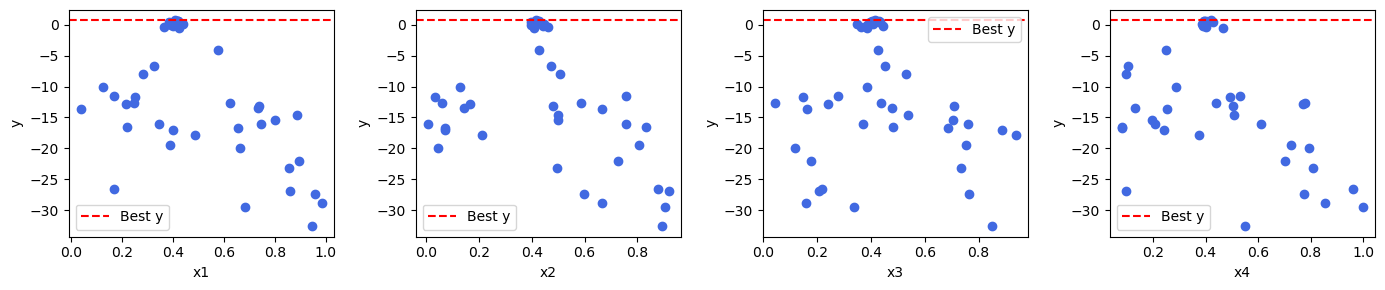

In [2]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
for i in range(4):
    axes[i].scatter(X[:, i], y, color='royalblue')
    axes[i].set_xlabel(f"x{i+1}")
    axes[i].set_ylabel("y")
    axes[i].axhline(max(y), color='red', linestyle='--', label='Best y')
    axes[i].legend()
plt.tight_layout()
plt.show()

## Bayesian Optimisation

In [3]:
n, d = X.shape
assert d == 4, f"Expected 4D, got {d}D"

# GP setup
kernel = (ConstantKernel(1.0, (1e-2, 1e2)) *
          Matern(length_scale=np.ones(d), nu=1.5) +        # ARD via length_scale per dim
          WhiteKernel(noise_level=5e-3, noise_level_bounds=(1e-6, 1e-1)))

gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=8,
                              normalize_y=True,
                              random_state=42)
gp.fit(X, y)

# Sobol candidate set in [0,1]^4
sob = Sobol(d=d, scramble=True, seed=None)
C = sob.random_base2(m=18)   

# GP predictions
mu, sigma = gp.predict(C, return_std=True)

# Expected Improvement (EI)
y_best = np.max(y)
xi = 0.01                      
imp = mu - y_best - xi
Z = imp / sigma
ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)

# Pick next query
x_next = C[np.argmax(ei)]

print("Next point to query:",
      "-".join(f"{x:.6f}" for x in x_next))

Next point to query: 0.392305-0.392411-0.405046-0.409231
